# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Make lists to hold weather data from API calls
list_city = []
list_lat = []
list_lng = []
list_temp = []
list_humidity = []
list_cloudiness = []
list_wind = []
list_cntry = []
list_date = []

counter = 0

# URL for our GET request
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='

# Loop through all cities, append the data to the list, and print results while processing
print('Begin retrieving data...')
print('-----------------------------')

for city in cities:
    try:
        response = requests.get(url + city).json()

        list_city.append(response['name'])
        list_lat.append(response['coord']['lat'])
        list_lng.append(response['coord']['lon'])
        list_temp.append(response['main']['temp_max'])
        list_humidity.append(response['main']['humidity'])
        list_cloudiness.append(response['clouds']['all'])
        list_wind.append(response['wind']['speed'])
        list_cntry.append(response['sys']['country'])
        list_date.append(response['dt'])
        
        print(f'Processing record {counter} for {city}')
        
    except:
        print('City not found. Skipping...')
        
    counter += 1

print('-----------------------------')
print('Data retrieval process done.')

Begin retrieving data...
-----------------------------
Processing record 0 for geraldton
Processing record 1 for kailua
Processing record 2 for busselton
Processing record 3 for rikitea
Processing record 4 for acari
Processing record 5 for oussouye
Processing record 6 for tuktoyaktuk
Processing record 7 for sechura
Processing record 8 for uruguaiana
Processing record 9 for alihe
Processing record 10 for punta arenas
Processing record 11 for cape town
Processing record 12 for hami
Processing record 13 for port alfred
Processing record 14 for atuona
Processing record 15 for yellowknife
Processing record 16 for walvis bay
Processing record 17 for suibara
Processing record 18 for jacmel
Processing record 19 for barrow
Processing record 20 for iskateley
Processing record 21 for mataura
Processing record 22 for alofi
Processing record 23 for jamestown
Processing record 24 for mahebourg
Processing record 25 for hobart
Processing record 26 for nelson bay
Processing record 27 for batticaloa
Pro

Processing record 238 for adrar
Processing record 239 for motihari
Processing record 240 for thinadhoo
Processing record 241 for pierre
Processing record 242 for aklavik
Processing record 243 for harper
Processing record 244 for quelimane
Processing record 245 for lucea
Processing record 246 for cassino
Processing record 247 for nouadhibou
Processing record 248 for dhidhdhoo
Processing record 249 for zdvinsk
Processing record 250 for longyearbyen
Processing record 251 for tasiilaq
Processing record 252 for upernavik
Processing record 253 for mareeba
Processing record 254 for southbridge
Processing record 255 for vestmannaeyjar
Processing record 256 for narragansett
Processing record 257 for tanout
Processing record 258 for seoul
City not found. Skipping...
Processing record 260 for kautokeino
Processing record 261 for tamworth
Processing record 262 for nyurba
Processing record 263 for lavrentiya
Processing record 264 for puri
City not found. Skipping...
Processing record 266 for kupang

Processing record 474 for omboue
Processing record 475 for hailar
Processing record 476 for kitimat
City not found. Skipping...
Processing record 478 for leningradskiy
Processing record 479 for kruisfontein
Processing record 480 for songjianghe
Processing record 481 for isangel
Processing record 482 for lorengau
City not found. Skipping...
Processing record 484 for nokha
Processing record 485 for saint-augustin
Processing record 486 for shumikha
Processing record 487 for tiznit
Processing record 488 for zeya
City not found. Skipping...
Processing record 490 for alice springs
Processing record 491 for mazara del vallo
Processing record 492 for bereda
Processing record 493 for praia da vitoria
Processing record 494 for sawtell
Processing record 495 for nemuro
Processing record 496 for ierapetra
Processing record 497 for srinagar
Processing record 498 for gladstone
Processing record 499 for hibbing
Processing record 500 for camacha
Processing record 501 for lichinga
Processing record 502 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Make a DataFrame with the data we retrieved
weather_data_df = pd.DataFrame({
    'City': list_city, 
    'Lat': list_lat, 
    'Lng': list_lng, 
    'Max Temp': list_temp, 
    'Humidity': list_humidity, 
    'Cloudiness': list_cloudiness, 
    'Wind Speed': list_wind, 
    'Country': list_cntry, 
    'Date': list_date
})

# Explort the city data into a CSV file
weather_data_df.to_csv(output_data_file, encoding='utf-8', index=False, header=True)

# Display the DataFrame
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,64.81,45,0,17.27,AU,1632165675
1,Kailua,21.4022,-157.7394,84.18,73,75,11.50,US,1632165539
2,Busselton,-33.6500,115.3333,51.10,69,0,9.95,AU,1632165675
3,Rikitea,-23.1203,-134.9692,74.07,77,13,17.36,PF,1632165194
4,Acarí,-15.4311,-74.6158,70.47,61,89,9.66,PE,1632165676


In [5]:
# Describe the DataFrame
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.171522,16.687772,66.421791,67.365248,52.173759,8.933865,1.632166e+09
std,32.952793,90.535931,18.436691,22.292850,40.307234,5.925576,1.122091e+02
min,-54.800000,-179.166700,15.400000,8.000000,0.000000,0.000000,1.632165e+09
25%,-7.990500,-60.575975,52.157500,57.000000,7.000000,4.582500,1.632166e+09
50%,23.999250,20.887250,70.080000,72.000000,54.500000,8.000000,1.632166e+09
75%,46.157075,93.143100,80.152500,85.000000,96.000000,11.885000,1.632166e+09
max,78.218600,179.316700,109.220000,100.000000,100.000000,38.010000,1.632166e+09


## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [6]:
# If there are any cities with humidity greater than 100%, identify how many, otherwise move on
check_humidity = weather_data_df.loc[weather_data_df['Humidity']>100]

humidity_over_100 = check_humidity.value_counts().tolist()

if humidity_over_100:
    print(f'Ugh! There are {len(humidity_over_100)} cities with humidity over 100%')
else:
    print('Whew! There are 0 cities with humidity over 100%')

Whew! There are 0 cities with humidity over 100%


Since there are no cities with humidity > 100% skipping ahead to plotting the data.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

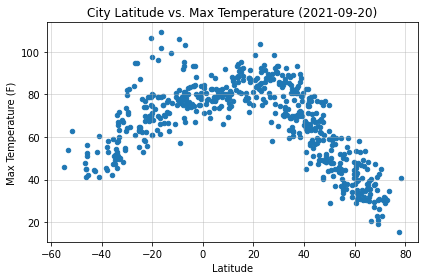

In [7]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Max Temp', 
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date.today()})')
plt.tight_layout()
plt.savefig('images/lat_vs_temp.png')
plt.show()

Observation: As the latitude moves away from the Equator, the temperature drops with a strong negative nonlinear relationship.

## Latitude vs. Humidity Plot

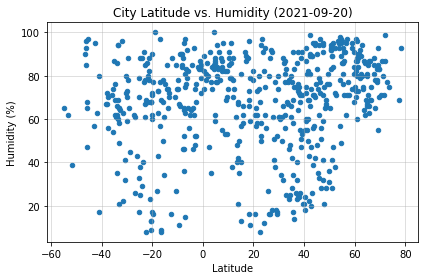

In [8]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Humidity', 
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.tight_layout()
plt.savefig('images/lat_vs_humidity.png')
plt.show()

Observation: A majority of cities have humidity above 60%, but there isn't any clear association between latitude and humidity.

## Latitude vs. Cloudiness Plot

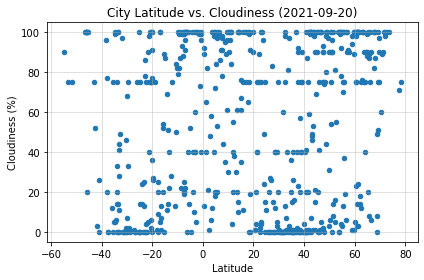

In [10]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Cloudiness', 
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.tight_layout()
plt.savefig('images/lat_vs_cloudiness.png')
plt.show()

Observation: Humidity is spread all over. There isn't any association between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

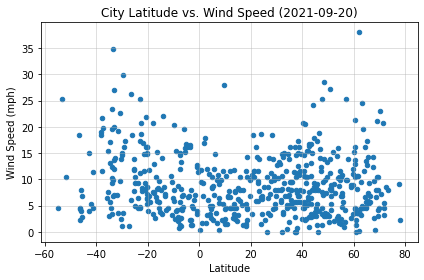

In [11]:
weather_data_df.plot.scatter(
    x = 'Lat', 
    y = 'Wind Speed', 
)
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.tight_layout()
plt.savefig('images/lat_vs_wind.png')
plt.show()

Observation: Wind speed for most cities is below 15 mph, but there isn't any linear association between latitude and wind speed.

## Linear Regression

In [12]:
# Make a DataFrame for each hemisphere
nhemisphere_df = weather_data_df[weather_data_df['Lat']>=0]
shemisphere_df = weather_data_df[weather_data_df['Lat']<0]

# Make a function for the linear regression because I don't wanna type this out every time
def linear_regression(x_value, y_value, x_label, y_label, filename):
    (slope, intercept, rvalue, _, _) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    print(f'The r-value is: {round(rvalue**2, 4)}')
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, 'r-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, coord, fontsize=14, color='r')
    plt.tight_layout()
    plt.savefig(f'images/{filename}.png')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6858


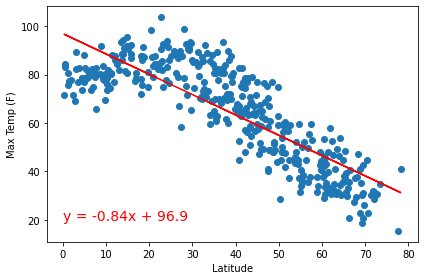

In [13]:
x_value = nhemisphere_df['Lat']
y_value = nhemisphere_df['Max Temp']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Max Temp (F)', 
    filename='nhemisphere_temp_vs_lat'
)

Observation: The temperature drops as latitude increases suggesting is a strong negative nonlinear correlation between latitude and temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4874


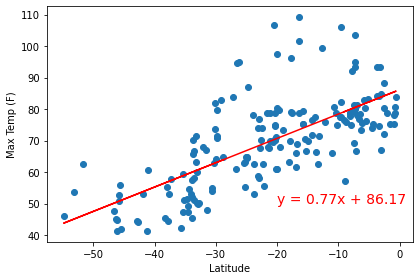

In [17]:
x_value = shemisphere_df['Lat']
y_value = shemisphere_df['Max Temp']
coord = (-20,50)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Max Temp (F)', 
    filename='shemisphere_temp_vs_lat'
)

Observation: Temperatures increase as latitude gets closer to the equator suggesting a moderate positive linear correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.023


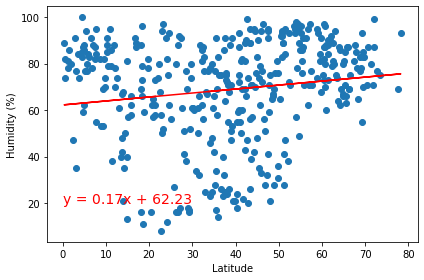

In [18]:
x_value = nhemisphere_df['Lat']
y_value = nhemisphere_df['Humidity']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Humidity (%)', 
    filename='nhemisphere_humidity_vs_lat'
)

Observation: While most cities in the nothern hemisphere appear to have humidity above 60%, but there isn't any linear correlation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0023


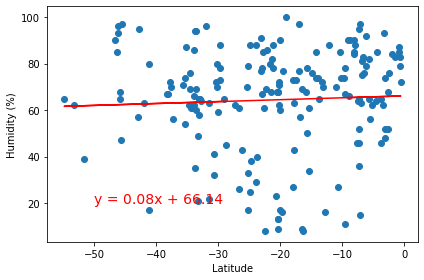

In [19]:
x_value = shemisphere_df['Lat']
y_value = shemisphere_df['Humidity']
coord = (-50,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Humidity (%)', 
    filename='shemisphere_humidity_vs_lat'
)

Observation: While several cities in the southern hemisphere appear to have humidity above 60% as well, there isn't any linear correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0132


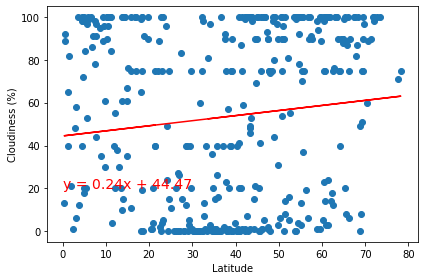

In [20]:
x_value = nhemisphere_df['Lat']
y_value = nhemisphere_df['Cloudiness']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    filename='nhemisphere_cloudiness_vs_lat'
)

Observation: While clusters are visible at the top and bottom range of cloudiness, there isn't any linear correlation between cloudiness and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0244


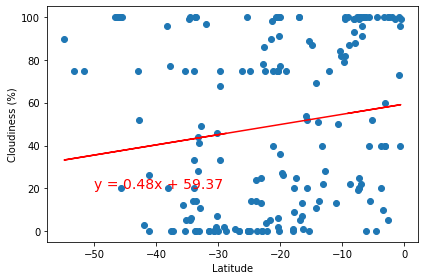

In [21]:
x_value = shemisphere_df['Lat']
y_value = shemisphere_df['Cloudiness']
coord = (-50,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Cloudiness (%)', 
    filename='shemisphere_cloudiness_vs_lat'
)

Observation: While clusters are visible closer to the equator, there isn't any linear correlation between cloudiness and latitude in the sothern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0135


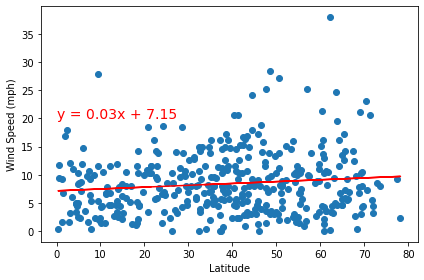

In [22]:
x_value = nhemisphere_df['Lat']
y_value = nhemisphere_df['Wind Speed']
coord = (0,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Wind Speed (mph)', 
    filename='nhemisphere_wind_vs_lat'
)

Observation: There isn't any linear correlation between wind speed and latitude in the nothern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0459


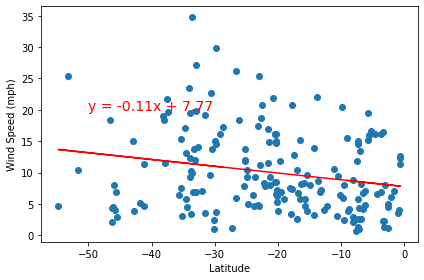

In [23]:
x_value = shemisphere_df['Lat']
y_value = shemisphere_df['Wind Speed']
coord = (-50,20)

linear_regression(
    x_value, 
    y_value, 
    x_label='Latitude', 
    y_label='Wind Speed (mph)', 
    filename='shemisphere_wind_vs_lat'
)

Observation: Cities closer to the equator have greater wind speeds suggesting a moderate negative linear correlation in the southern hemisphere. 